

# **Keras Cats vs Dogs - Training using your own data**

---

In this lesson, we learn how to setup data generators to load our own dataset and train a classifier using Keras.
1. Download and Explore our data
2. Create a simple CNN
3. Create our Data Generators
4. Train our model
5. Test some inferences
6. Checkpoints

In [1]:
# import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/MyDrive/Computer Vision/dogs-vs-cats.zip" /content/


In [4]:
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

In [5]:
# Define our images sizes
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

### **Loading our data and it's labels into a dataframe**

There are many ways we can do this, this way is relatively simple to follow.

`dog.1034234.jpg`

In [6]:
filenames = os.listdir("./train")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'class': categories
})
df.head()

,filename,class
0,cat.1841.jpg,0
1,cat.6502.jpg,0
2,cat.8978.jpg,0
3,cat.11912.jpg,0
4,cat.10963.jpg,0


<Axes: xlabel='class'>

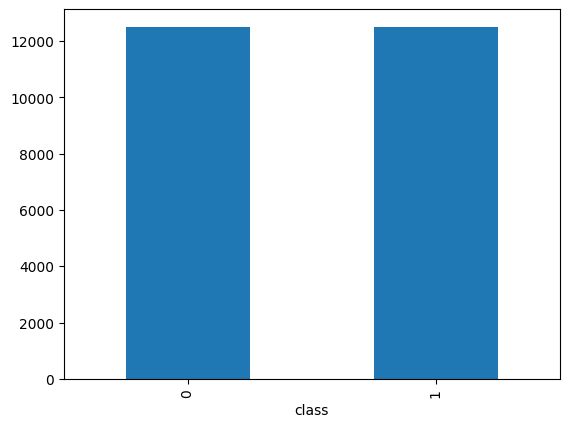

In [7]:
df['class'].value_counts().plot.bar()

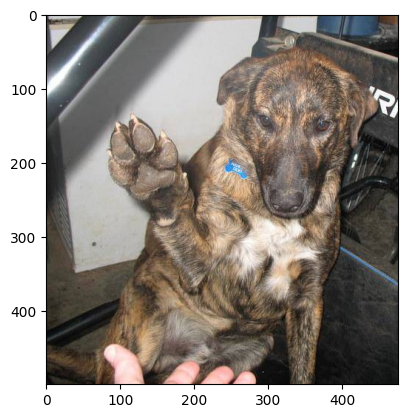

In [8]:
sample = random.choice(filenames)
image = load_img("./train/" + sample)
plt.imshow(image)

## **2. Create our Model**

In [9]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 58, 58, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466,594 (1.78 MB)

 Trainable params: 466,594 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## **3. Create our Data Generators**

In [10]:
df["class"] = df["class"].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,cat.1841.jpg,cat
1,cat.6502.jpg,cat
2,cat.8978.jpg,cat
3,cat.11912.jpg,cat
4,cat.10963.jpg,cat


#### **Split our dataset using train_test_split**

In [11]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=7)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [12]:
train_df.head()

,filename,class
0,cat.2828.jpg,cat
1,dog.837.jpg,dog
2,cat.4552.jpg,cat
3,dog.8102.jpg,dog
4,dog.5865.jpg,dog


In [13]:
validate_df.head()

,filename,class
0,dog.10962.jpg,dog
1,dog.144.jpg,dog
2,dog.2079.jpg,dog
3,cat.3963.jpg,cat
4,dog.247.jpg,dog


### **Create our Training Data Generator**

In [14]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### **Create our Validation Data Generator**

In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


#### **Creating an example Data Generator to load just a single image**

In [15]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


#### **Preview that image**

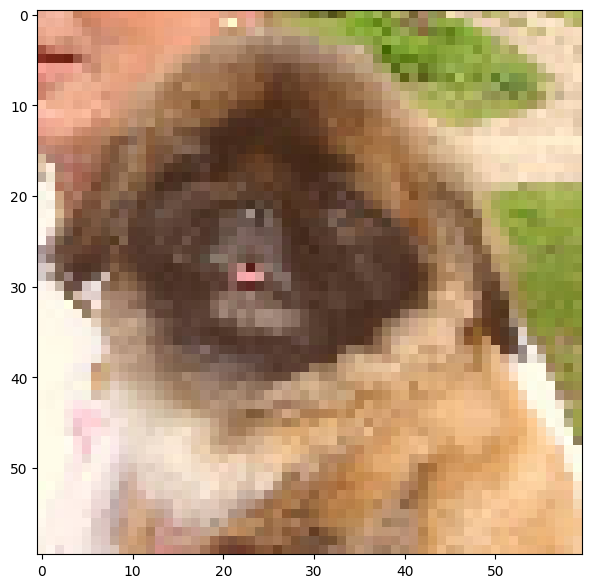

In [16]:
plt.figure(figsize=(6, 6))

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

## **4. Start Training Our Model**

In [19]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 218ms/step - accuracy: 0.5506 - loss: 0.6769 - val_accuracy: 0.6989 - val_loss: 0.5687
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.5397
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 204ms/step - accuracy: 0.7293 - loss: 0.5376 - val_accuracy: 0.7173 - val_loss: 0.5496
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.8948
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.7698 - loss: 0.4701 - val_accuracy: 0.7837 - val_loss: 0.4493
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6639
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.8110 - loss: 0.4122 - val_accuracy: 0.7776 - val_loss: 0.4669
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4104
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 186ms/step - accuracy: 0.8338 - loss: 0.3658 - val_accuracy: 0.8065 - val_loss: 0.4193
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.0000

In [21]:
model.save_weights("cats_vs_dogs_10_epochs.weights.h5")


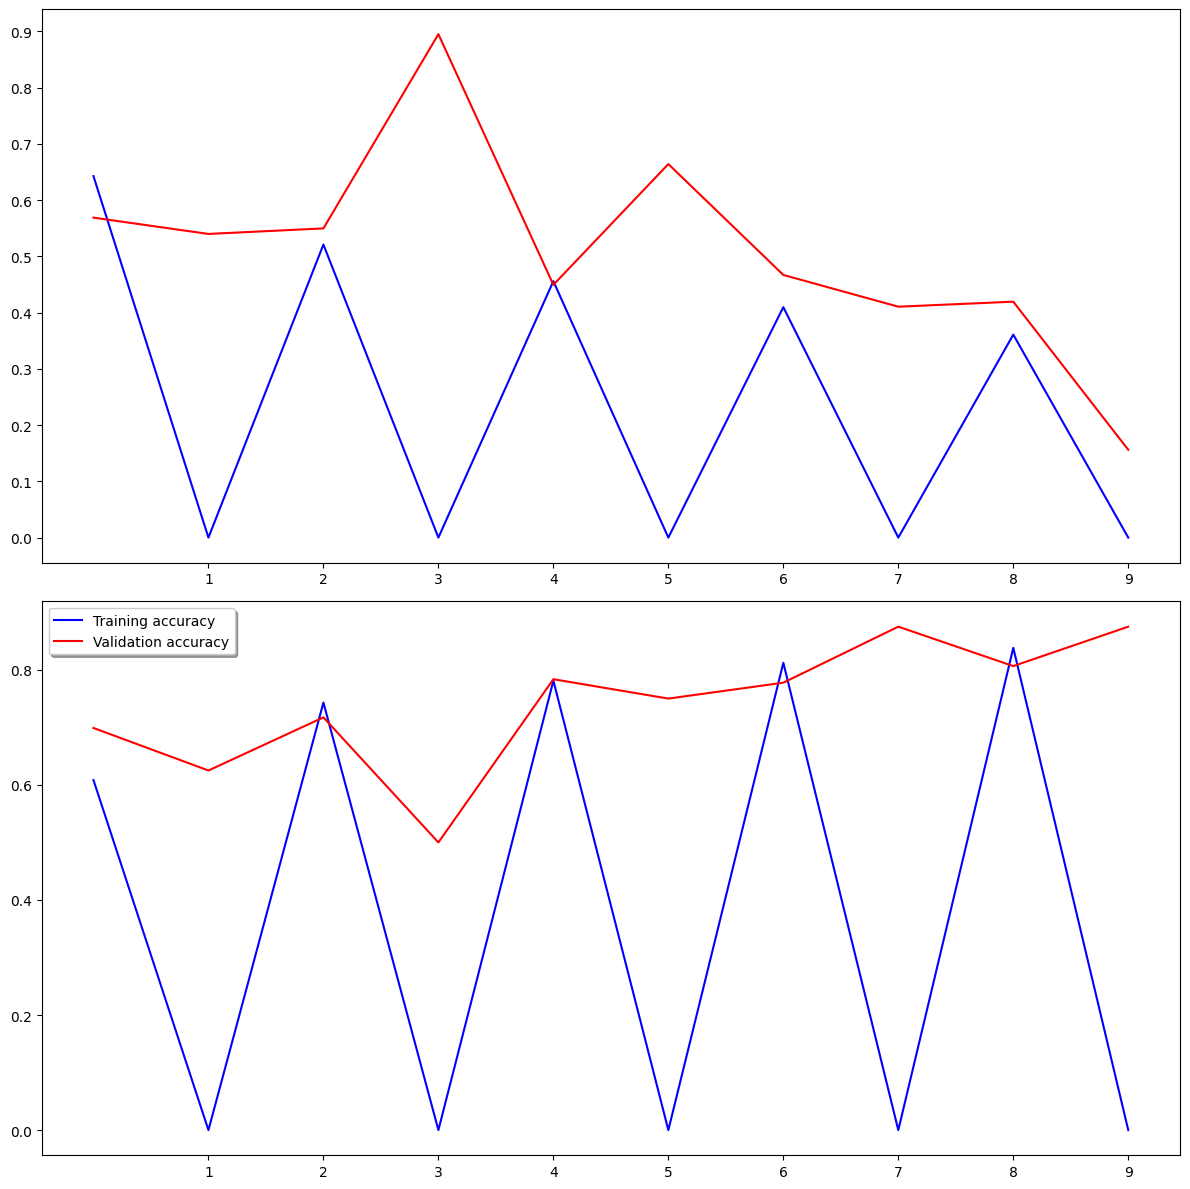

In [30]:
# Viewour for performance plots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#### **Get the predictions for our validation images**

In [25]:
# We run our prediction on all images in the validation set
predict = model.predict(validation_generator, steps=int(np.ceil(5000 / batch_size)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step


#### **Add it to our dataframe for eacy viewing**

In [26]:
validate_df['predicted'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['predicted'] = validate_df['predicted'].replace(label_map)
validate_df

,filename,class,predicted
0,dog.10962.jpg,dog,cat
1,dog.144.jpg,dog,cat
2,dog.2079.jpg,dog,cat
3,cat.3963.jpg,cat,cat
4,dog.247.jpg,dog,dog
...,...,...,...
4995,dog.7274.jpg,dog,cat
4996,cat.7020.jpg,cat,cat
4997,cat.3049.jpg,cat,dog
4998,dog.817.jpg,dog,cat


## **Inference on a batch of images from our validation dataset**

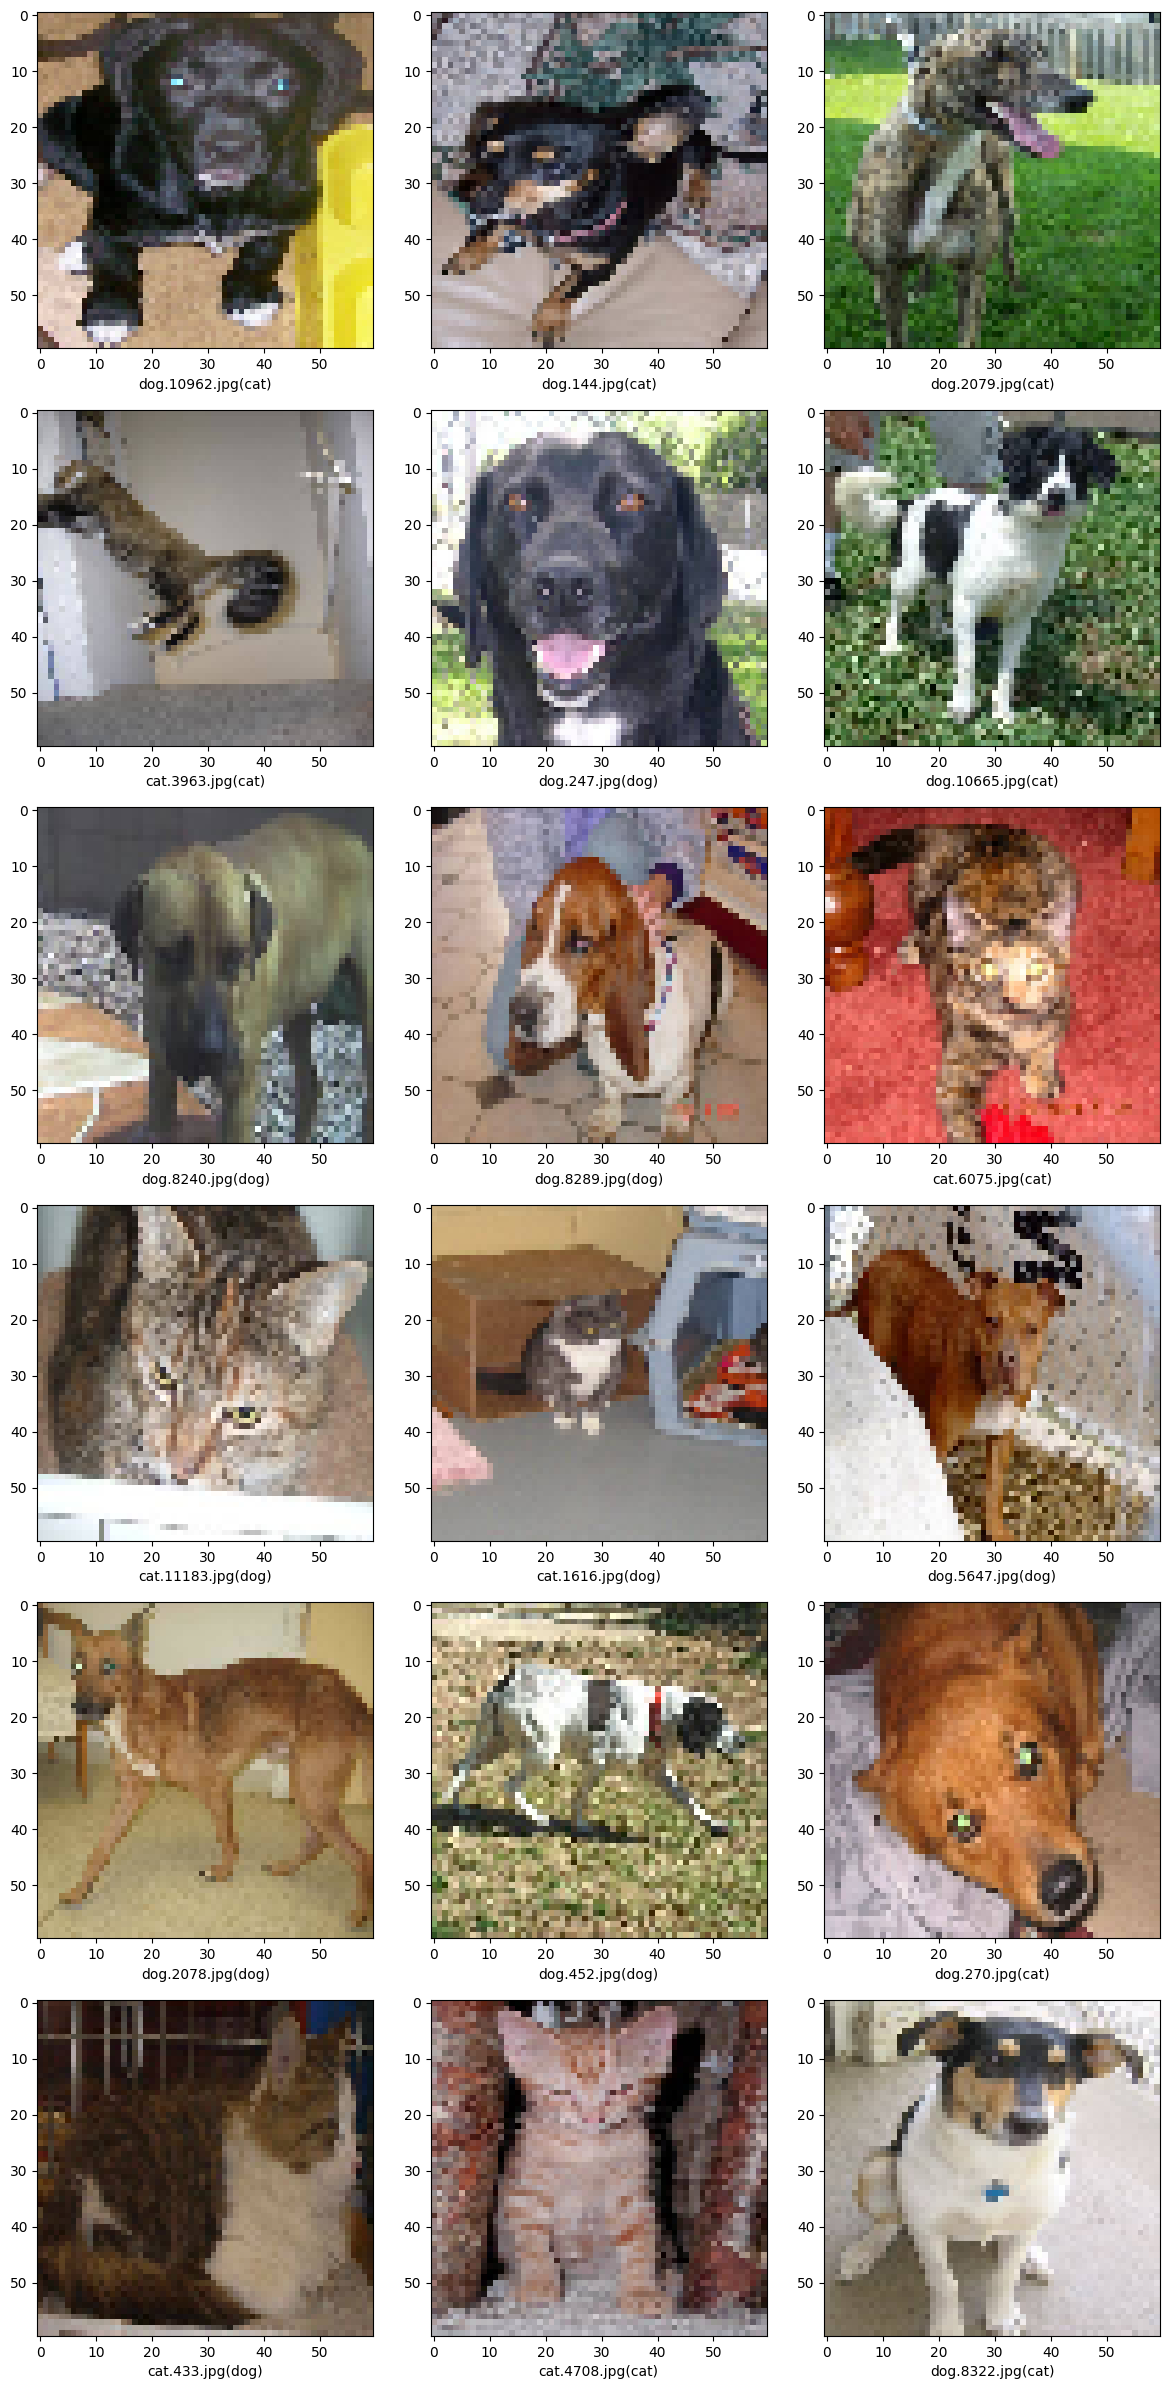

In [27]:
sample_test = validate_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['predicted']
    img = load_img("./train/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )

plt.tight_layout()
plt.show()

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [34]:
checkpoint = ModelCheckpoint("checkpoint.model.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 5, #Number of epochs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

### **Another useful callback is Reducing our learning Rate on Plateau**

We can avoid having our oscillate around the global minimum by attempting to reduce the Learn Rate by a certain fact. If no improvement is seen in our monitored metric (val_loss typically), we wait a certain number of epochs (patience) then this callback reduces the learning rate by a factor

In [35]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

In [36]:
# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [37]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8658 - loss: 0.3099
Epoch 1: val_loss improved from inf to 0.45302, saving model to checkpoint.model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.8658 - loss: 0.3099 - val_accuracy: 0.7989 - val_loss: 0.4530 - learning_rate: 5.0000e-04
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.45302
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9755 - learning_rate: 5.0000e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8909 - loss: 0.2607
Epoch 3: val_loss did not improve from 0.45302
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 181ms/step - accuracy: 0.8909 - loss: 0.2607 - val_accuracy: 0.8027 - val_loss: 0.4570 - learning_rate: 5.0000e-04
Epoch 4/10

Epoch 4: val_loss improved from 0.45302 to 0.25143, saving model to checkpoint.model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2514 - learning_rate: 5.0000e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9078 - loss: 0.2176
Epoch 5: val_loss did not improve from 0.25143
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 181ms/step - accuracy: 0.9078 - loss: 0.2176 - val_accuracy: 0.7991 - val_loss: 0.4905 -